In [10]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df_bmw = pd.read_csv('../../../../BMW_sales_data_realistic_v3.csv')
df_bmw.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.7,174234,43081,2210,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,155643,25161,111,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,2.1,53465,140306,1510,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.5,14951,77114,377,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.6,53989,32752,190,Low


In [ ]:
# identificar cuales son los datos que recolecta esta base de datos 
df_bmw.columns.tolist()

['Model',
 'Year',
 'Region',
 'Color',
 'Fuel_Type',
 'Transmission',
 'Engine_Size_L',
 'Mileage_KM',
 'Price_USD',
 'Sales_Volume',
 'Sales_Classification']

In [ ]:
# identificar el total de datos en las filas
num_rows = len(df_bmw)
print(num_rows)

50000


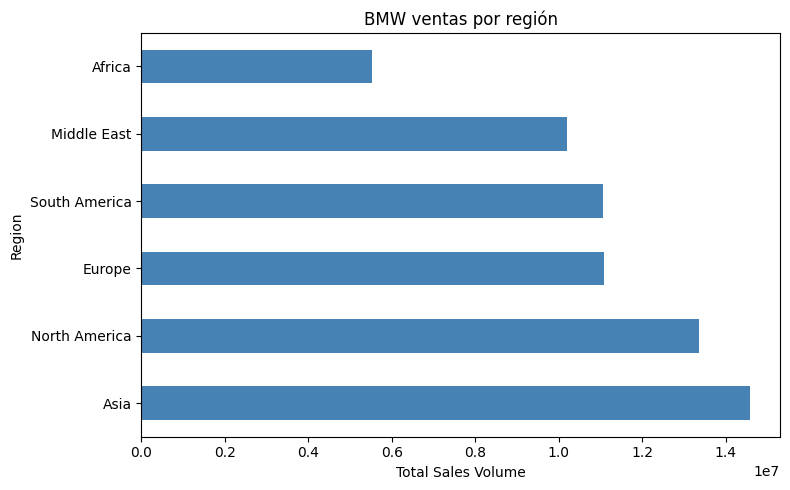

In [37]:
# Ventas totales por región
sales_by_region = df_bmw.groupby('Region')['Sales_Volume'].sum().sort_values(ascending=False)

sales_by_region.plot(kind='barh', color='steelblue', figsize=(8, 5))
plt.title('BMW ventas por región')
plt.xlabel('Total Sales Volume')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

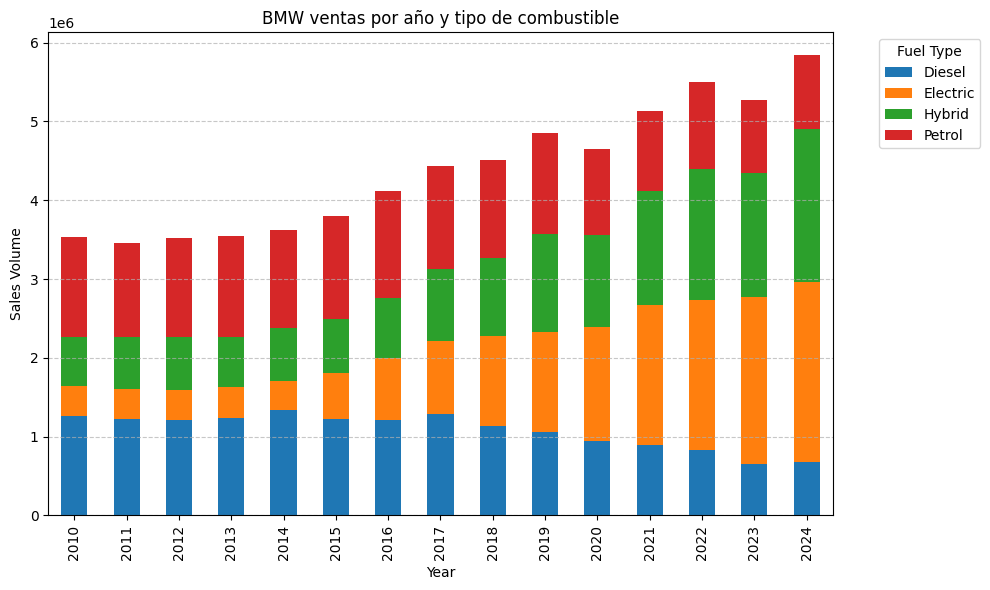

In [ ]:
# Group data by Year and Fuel_Type using df_bmw
sales_by_year_fuel = df_bmw.groupby(['Year', 'Fuel_Type'])['Sales_Volume'].sum().unstack(fill_value=0)

# Grafica de ventas por año y tipo de combustible
sales_by_year_fuel.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('BMW ventas por año y tipo de combustible')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

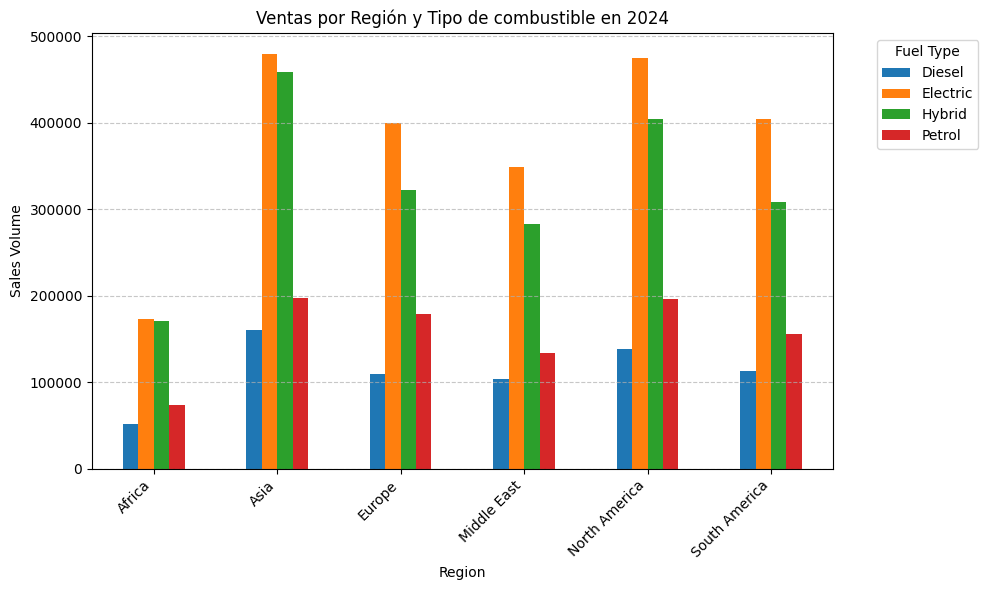

In [ ]:
# Identificar cual es el ultimo año de ventas en la base de datos
last_year = df_bmw['Year'].max()

# Filtrar para el ultimo año
df_last = df_bmw[df_bmw['Year'] == last_year]

# Agrupor por Region y rendimiento de combustible 
group = df_last.groupby(['Region', 'Fuel_Type'])['Sales_Volume'].sum().unstack(fill_value=0)

# Graficar 
ax = group.plot(kind='bar', figsize=(10, 6))
plt.title(f'Ventas por Región y Tipo de combustible en {last_year}')
plt.xlabel('Region')
plt.ylabel('Sales Volume')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

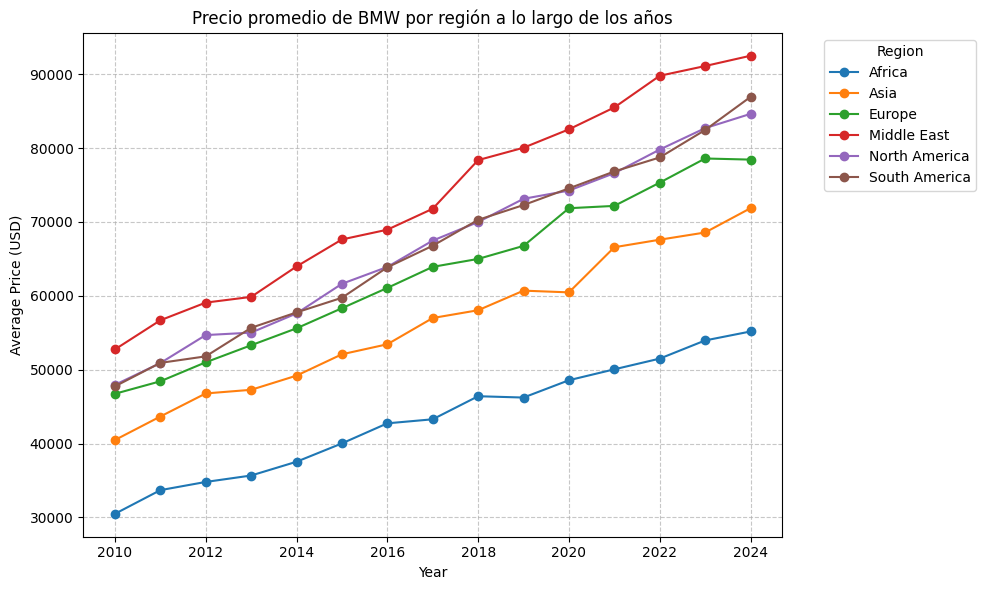

In [39]:
# Entender el aumento de precios por región
avg_price = df_bmw.groupby(['Year', 'Region'])['Price_USD'].mean().unstack()   #obtener el precio promedio por año y región

# Graficar 
plt.figure(figsize=(10, 6))
for region in avg_price.columns:
    plt.plot(avg_price.index, avg_price[region], marker='o', label=region)

plt.title('Precio promedio de BMW por región a lo largo de los años')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

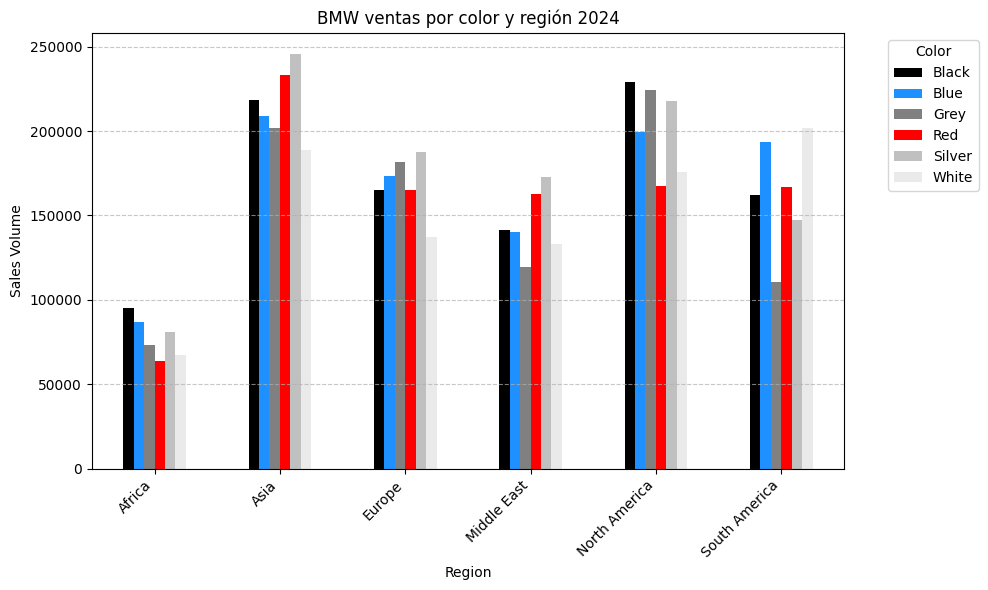

In [40]:
# Ventas por color y región en el último año
# Identificar cual es el último año de ventas en la base de datos 
last_year = df_bmw['Year'].max()
df_last_year = df_bmw[df_bmw['Year'] == last_year]

# agrupar por región y color
color_region = df_last_year.groupby(['Region', 'Color'])['Sales_Volume'].sum().unstack(fill_value=0)

# Definir el código de color de acuerdo a los colores comunes de los autos vendidos 
color_map = {
    'Black': '#000000',
    'White': '#EAEAEA',
    'Grey': '#808080',
    'Silver': '#C0C0C0',
    'Blue': '#1E90FF',
    'Red': '#FF0000',
    'Green': '#228B22',
    'Yellow': '#FFD700',
    'Brown': '#8B4513',
    'Orange': '#FFA500',
    'Beige': '#F5F5DC',
    'Gold': '#DAA520'
}

# Asignar los colores a las barras de la gráfica
bar_colors = [color_map.get(c, '#808080') for c in color_region.columns]

# Graficar
ax = color_region.plot(kind='bar', figsize=(10, 6), color=bar_colors)

plt.title(f'BMW ventas por color y región {last_year}')
plt.xlabel('Region')
plt.ylabel('Sales Volume')
plt.legend(title='Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()